# Principal Component Analysis with Cancer Data

In [123]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [124]:
cancer_ds=pd.read_csv("cancer.csv")
cancer_ds.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [129]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [113]:
cancer_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [62]:
pandas_profiling.ProfileReport(cancer_ds)

Number of variables,11
Number of observations,699
Total Missing (%),0.0%
Total size in memory,60.1 KiB
Average record size in memory,88.1 B
Numeric,8
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,1


In [132]:
#here class is the output variable 

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [125]:
# We could see "?" values in column, this should be removed from data set
# Check for missing value in any other column

# Bare Nuclei has value like '?''
cancer_ds.dropna(inplace = True) 


In [126]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?

#cancer_ds.loc[cancer_ds['column_name'] == some_value]
tempds=cancer_ds.loc[cancer_ds['Bare Nuclei'] == '?']
tempds.info()
#there are 16 rows with '?'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 23 to 617
Data columns (total 11 columns):
ID                             16 non-null int64
ClumpThickness                 16 non-null int64
Cell Size                      16 non-null int64
Cell Shape                     16 non-null int64
Marginal Adhesion              16 non-null int64
Single Epithelial Cell Size    16 non-null int64
Bare Nuclei                    16 non-null object
Normal Nucleoli                16 non-null int64
Bland Chromatin                16 non-null int64
Mitoses                        16 non-null int64
Class                          16 non-null int64
dtypes: int64(10), object(1)
memory usage: 1.5+ KB


In [127]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
temp_array = cancer_ds[cancer_ds['Bare Nuclei']!='?']["Bare Nuclei"]
temp_array= pd.to_numeric(temp_array)
cancer_ds["Bare Nuclei"].replace('?',temp_array.median(),inplace=True) 

In [128]:
cancer_ds.loc[cancer_ds['Bare Nuclei'] == '?']
#now there are no rows with values '?'

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


# Q4. Perform bi variate analysis including correlation & pairplots. 


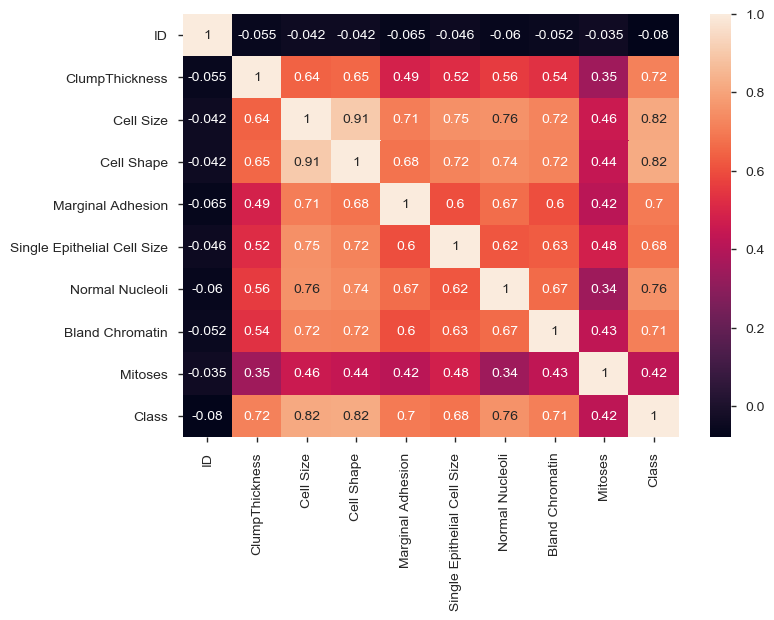

In [67]:
# Check for correlation of variable
sns.heatmap(cancer_ds.corr(), annot=True)

In [8]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables


F:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
F:\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
F:\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
F:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


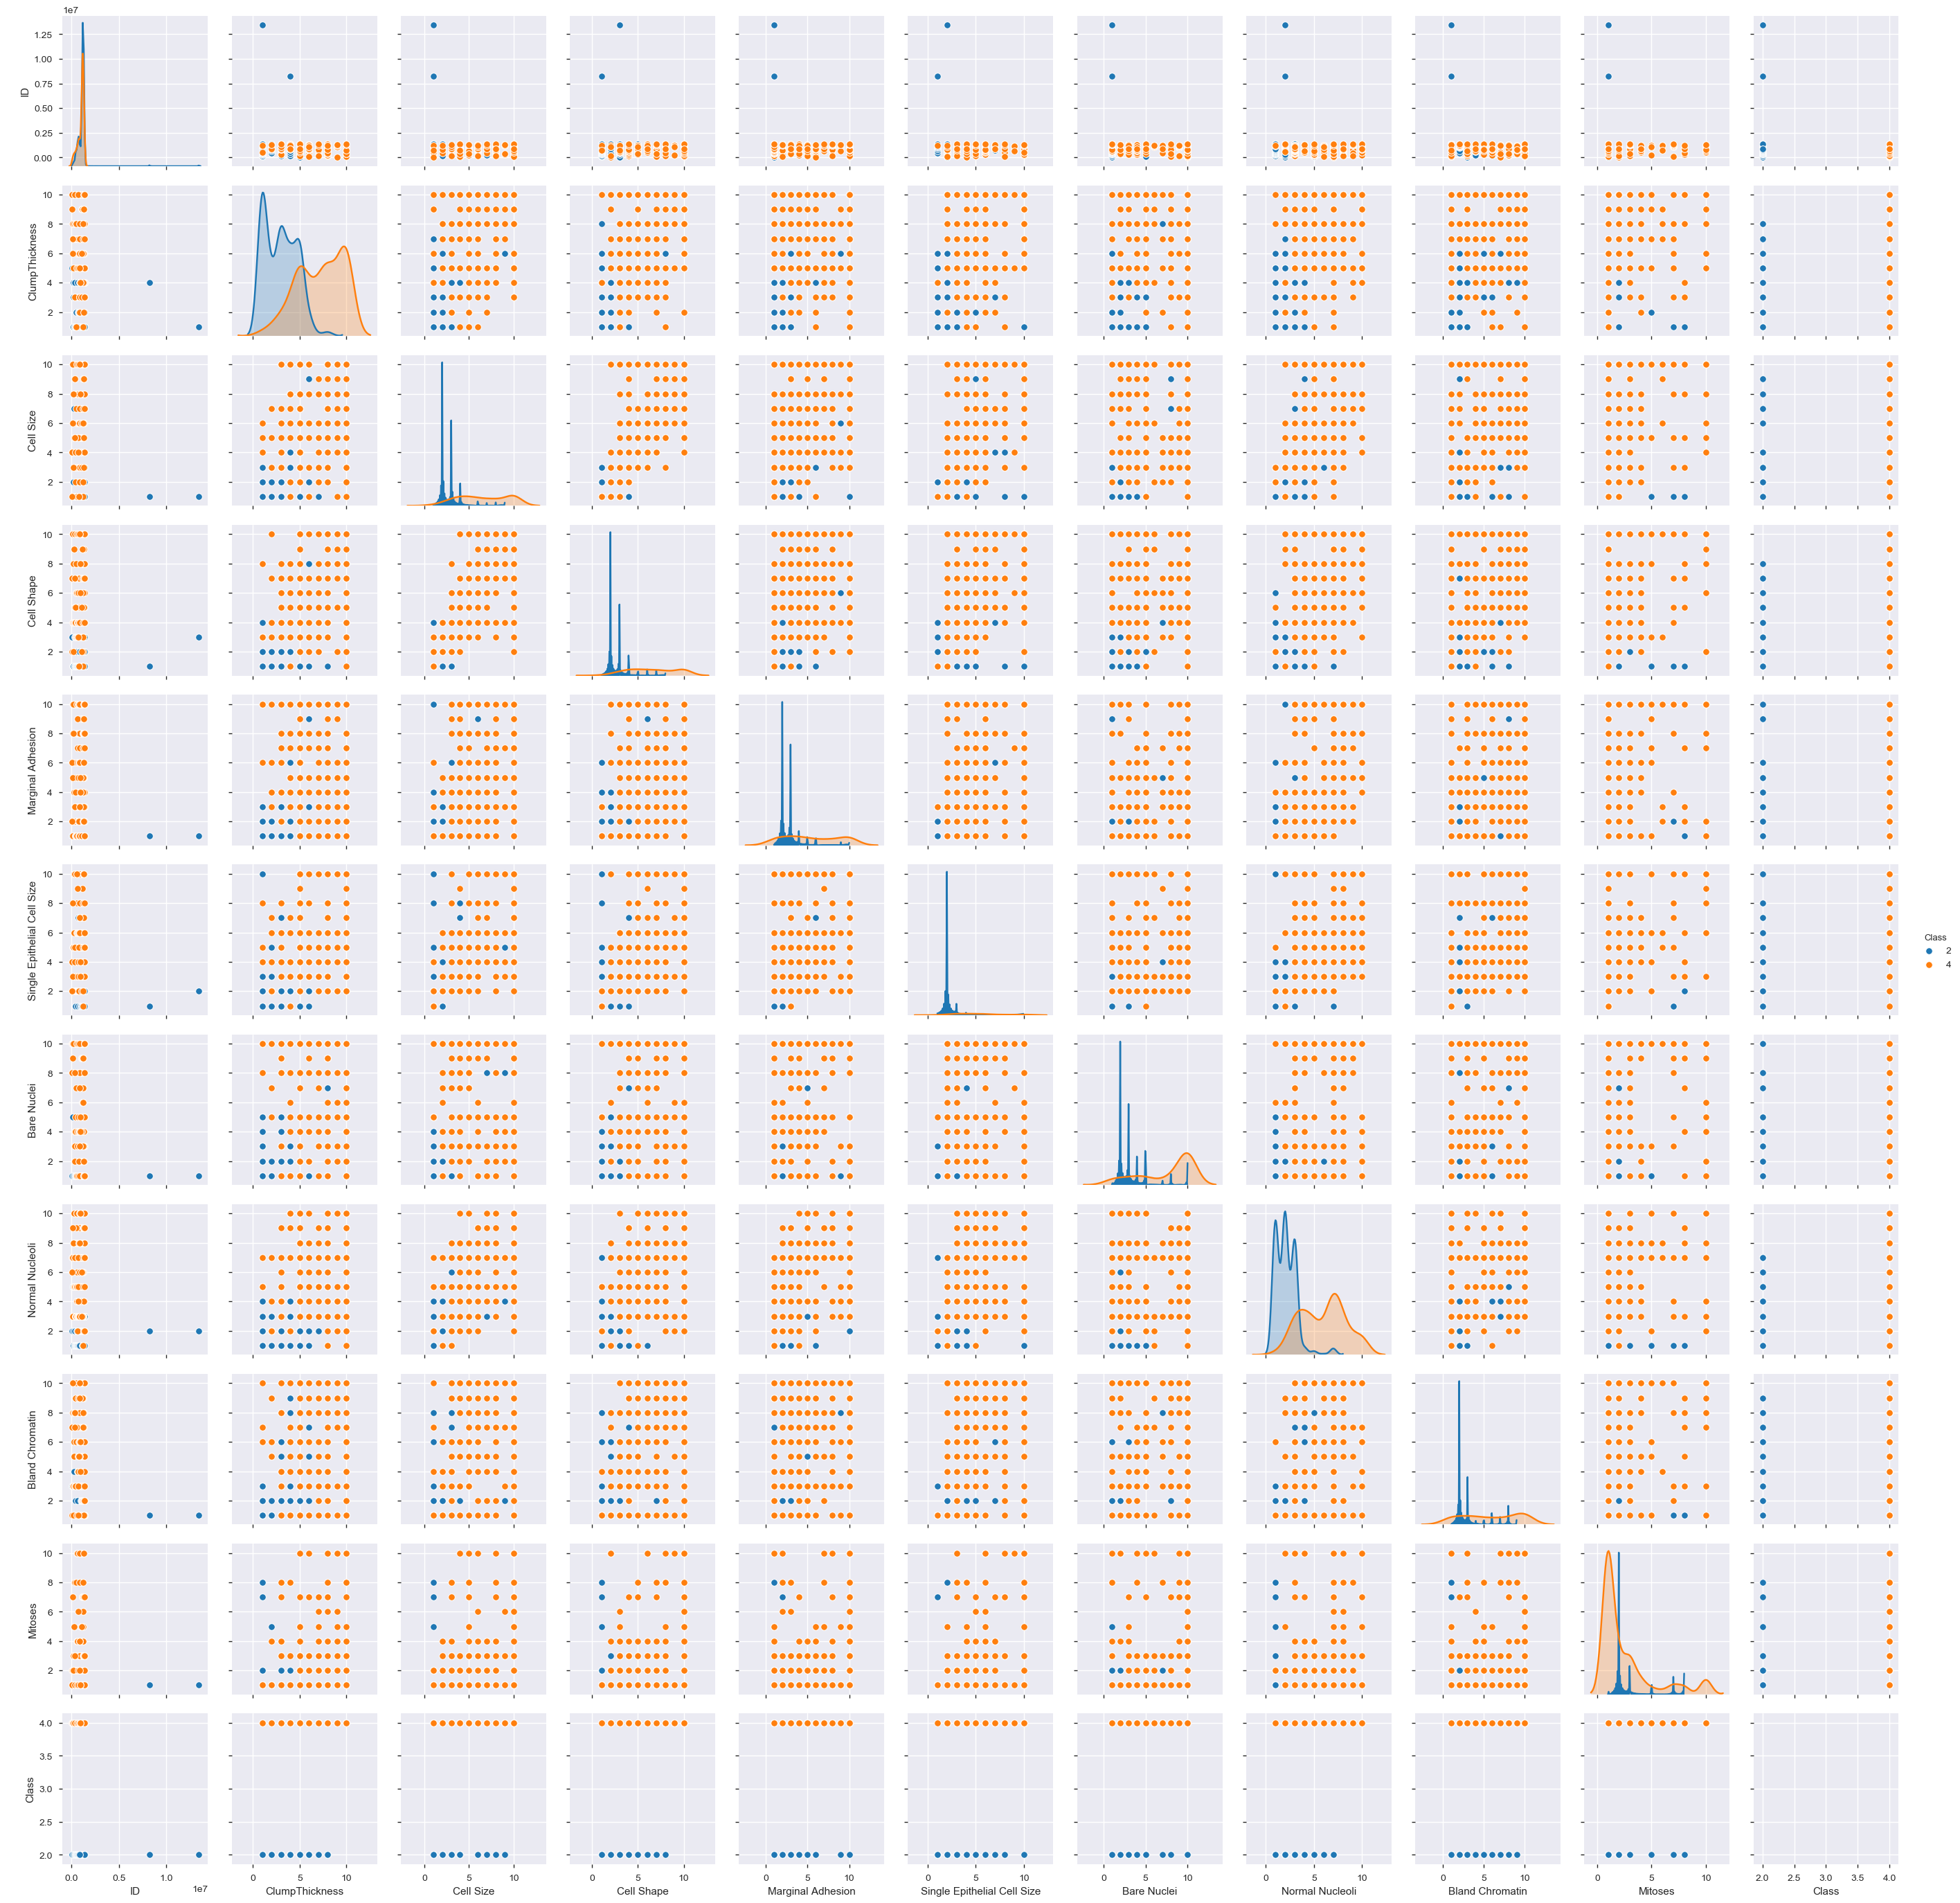

In [68]:
#Let us check for pair plots
cancer_ds["Bare Nuclei"] = pd.to_numeric(cancer_ds["Bare Nuclei"])
sns.pairplot(cancer_ds, diag_kind='kde', hue= 'Class')

# Q5 Remove any unwanted columns or outliers, standardize variables in this pre-processing step

In [108]:
# We could see most of the outliers are now removed.

In [129]:
#Id column has 
cancer_ds= cancer_ds.apply(pd.to_numeric)
#cancer_ds=cancer_ds.drop('ID',axis=1)
cancer_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null float64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 65.5 KB


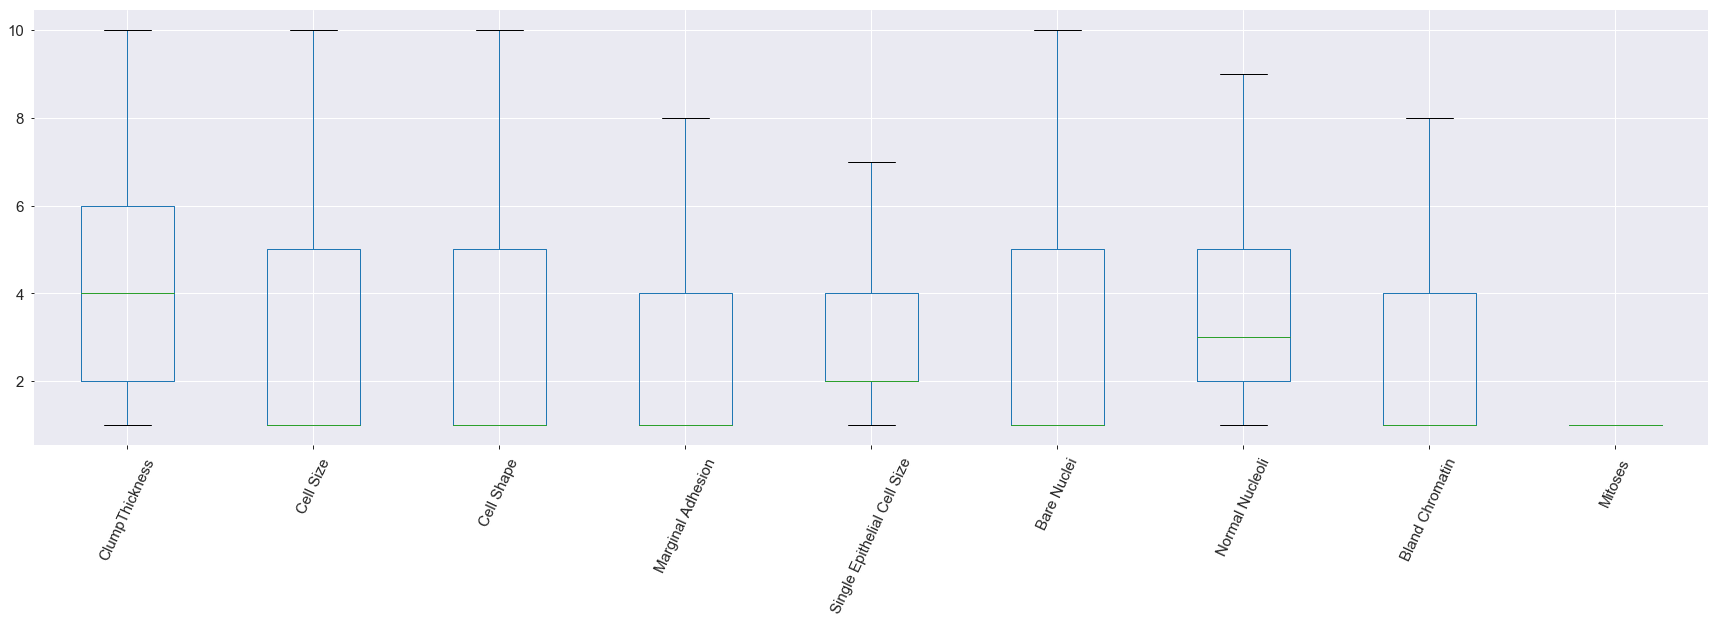

In [130]:
#cancer_ds.boxplot(figsize=(20,3));
#plt.title('')

cancer_ds.boxplot(column=['ClumpThickness','Cell Size','Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Normal Nucleoli','Bland Chromatin','Mitoses'],rot=65,fontsize=15,figsize=(30,8))


OUTLIER Removal

In [131]:
pd.crosstab((cancer_ds['Marginal Adhesion']),cancer_ds['Class'])
cancer_ds['Marginal Adhesion'] = np.where(cancer_ds['Marginal Adhesion'] > 5, 5, cancer_ds['Marginal Adhesion'])

In [46]:
pd.crosstab((cancer_ds['Single Epithelial Cell Size']),cancer_ds['Class'])
cancer_ds['Single Epithelial Cell Size'] = np.where(cancer_ds['Single Epithelial Cell Size'] > 7, 7, cancer_ds['Single Epithelial Cell Size'])

In [132]:
pd.crosstab((cancer_ds['Normal Nucleoli']),cancer_ds['Class'])
cancer_ds['Normal Nucleoli'] = np.where(cancer_ds['Normal Nucleoli'] > 8, 8, cancer_ds['Normal Nucleoli'])

In [40]:
pd.crosstab((cancer_ds['Bland Chromatin']),cancer_ds['Class'])
cancer_ds['Bland Chromatin'] = np.where(cancer_ds['Bland Chromatin'] > 8, 8, cancer_ds['Bland Chromatin'])

In [55]:
pd.crosstab((cancer_ds['Mitoses']),cancer_ds['Class'])
cancer_ds['Mitoses'] = np.where(cancer_ds['Mitoses'] > 2, 2, cancer_ds['Mitoses'])

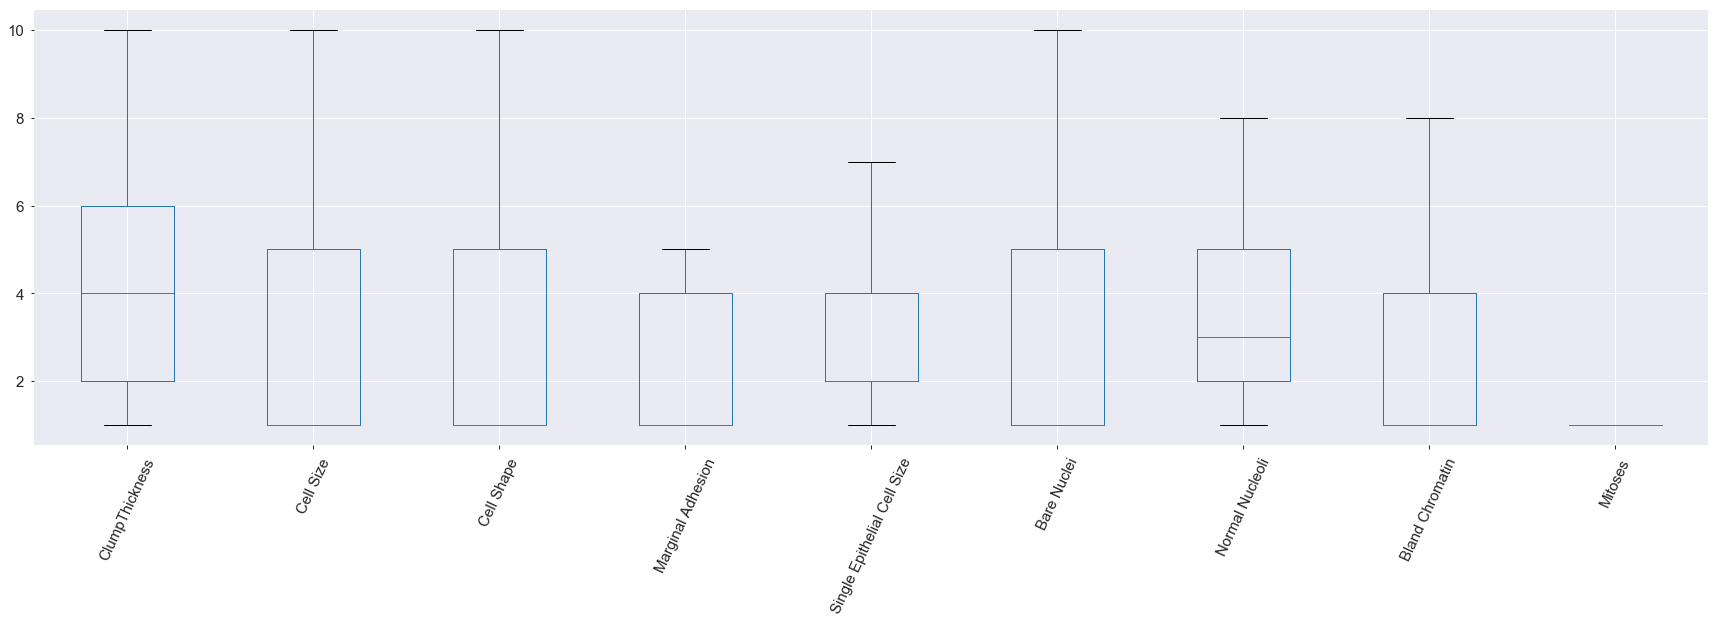

In [133]:
#after outlier removal
cancer_ds.boxplot(column=['ClumpThickness','Cell Size','Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Normal Nucleoli','Bland Chromatin','Mitoses'],rot=65,fontsize=15,figsize=(30,8))


In [135]:
print(cancer_ds.shape)
# dropping duplicate values
cancer_ds.drop_duplicates(keep=False,inplace=True) 
#cancer_ds.drop_duplicates()
print(cancer_ds.shape)

(699, 11)
(681, 11)


# Q6 Create a covariance matrix for identifying Principal components

In [137]:
X = cancer_ds.drop(["Class", 'ID'], axis=1)
Y = cancer_ds["Class"]
X.shape

(681, 9)

In [138]:
# PCA
# Step 1 - Create covariance matrix
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00147059 0.64234491 0.65354921 0.54469903 0.5133151  0.59219745
  0.57721834 0.53594814 0.35086888]
 [0.64234491 1.00147059 0.90508434 0.74326282 0.74304454 0.68340039
  0.76234033 0.73252941 0.46188521]
 [0.65354921 0.90508434 1.00147059 0.7242003  0.70960712 0.70176656
  0.74209093 0.73088509 0.44269287]
 [0.54469903 0.74326282 0.7242003  1.00147059 0.6232463  0.71071806
  0.70356499 0.63003268 0.35975458]
 [0.5133151  0.74304454 0.70960712 0.6232463  1.00147059 0.5779985
  0.62514612 0.64008529 0.48682003]
 [0.59219745 0.68340039 0.70176656 0.71071806 0.5779985  1.00147059
  0.68408226 0.58252319 0.34378718]
 [0.57721834 0.76234033 0.74209093 0.70356499 0.62514612 0.68408226
  1.00147059 0.67904034 0.34281919]
 [0.53594814 0.73252941 0.73088509 0.63003268 0.64008529 0.58252319
  0.67904034 1.00147059 0.42725232]
 [0.35086888 0.46188521 0.44269287 0.35975458 0.48682003 0.34378718
  0.34281919 0.42725232 1.00147059]]


F:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Q7 Identify eigen values and eigen vector

In [120]:
# Step 2- Get eigen values and eigen vector

In [139]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.30313192  0.11413638 -0.85693821 -0.00897982  0.29715373  0.06567724
  -0.25073774  0.06109737 -0.0380007 ]
 [-0.37896919  0.01993068  0.09788028 -0.73631244  0.17500047  0.11014297
   0.35399453  0.05713673  0.36457536]
 [-0.37554829  0.05079411  0.03815668  0.66347802  0.17383193  0.05730209
   0.52216028  0.10470337  0.31242473]
 [-0.34281576  0.19289894  0.16259891  0.0547348  -0.44283367  0.0213453
  -0.48612374  0.54525361  0.29267384]
 [-0.33302561 -0.20380807  0.28931804  0.06499108  0.19582247  0.72798911
  -0.23626727 -0.12419201 -0.34650683]
 [-0.3325638   0.24085756 -0.15398977 -0.07386281 -0.60195525 -0.00185399
   0.38218619 -0.10343984 -0.53207212]
 [-0.34781086  0.21532874  0.14267138  0.06370728 -0.03720801 -0.26960234
  -0.30794992 -0.76423325  0.23514234]
 [-0.33661615 -0.04248422  0.27571729 -0.02522857  0.41779678 -0.58564178
  -0.07719869  0.26555511 -0.4628375 ]
 [-0.22393452 -0.89390388 -0.15617009  0.01377399 -0.27949982 -0.18488534
  -0.

# Q8 Find variance and cumulative variance by each eigen vector

In [122]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.921024584221289, array([-0.30127908, -0.38055469, -0.37681845, -0.33586962, -0.33540815,
       -0.3322296 , -0.34685533, -0.33714692, -0.22968825])), (0.7780552902526566, array([-0.15248258, -0.04744357, -0.08172434, -0.05504446,  0.18350905,
       -0.24645212, -0.2296583 ,  0.01663441,  0.90407719])), (0.5426537017187102, array([ 0.86939703, -0.05056429,  0.00920095, -0.36263845, -0.19767953,
        0.05360529, -0.17203517, -0.14092328,  0.13636186])), (0.4660613773758057, array([-0.01964121, -0.17749583, -0.16099367,  0.49934461, -0.28548768,
        0.56595236, -0.02773189, -0.49292602,  0.21747422])), (0.36082448877099094, array([-0.06896661, -0.10038627, -0.04581836, -0.01348887, -0.74727698,
        0.0202057 ,  0.25975922,  0.5658051 ,  0.19090184])), (0.3034141056113842, array([ 0.12408352,  0.27777422,  0.20443477,  0.3548647 , -0.28039319,
       -0.65056375,  0.28028694, -0.3977106 ,  0.03367808])), (0.2874956914611639, array([ 0.14113397,  0.02658929,  0.07407408,  0

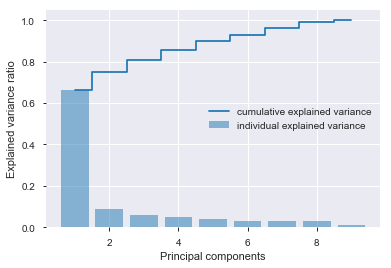

In [140]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 10 entries as there are 10 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [141]:
from sklearn.decomposition import PCA

In [142]:
X_centered = X - X.mean(axis=0)

In [143]:
#from the above graph we can conclude that n components can be taken as 7.
pca = PCA(n_components=7)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)
X_pca.shape

(681, 7)

# Q10 Find correlation between components and features

In [144]:
pca.components_

array([[ 0.31674159,  0.41942186,  0.40711964,  0.19938107,  0.25649617,
         0.45703022,  0.28562442,  0.38109994,  0.12952015],
       [-0.14711818,  0.22670069,  0.16578169, -0.05215722,  0.19231598,
        -0.78187564,  0.00651071,  0.46879674,  0.16920807],
       [-0.89921638, -0.01458226, -0.03375555,  0.09173463,  0.07901168,
         0.31890357,  0.09365362,  0.2537104 , -0.02367045],
       [-0.24066674,  0.40921744,  0.33392166,  0.06163484,  0.28328224,
        -0.11119335, -0.0098593 , -0.73859058,  0.14523095],
       [ 0.04509889, -0.21072631, -0.24276327, -0.06903502,  0.34579661,
         0.15580796, -0.30574964,  0.0250504 ,  0.80740256],
       [-0.07711171,  0.18552843,  0.42718065, -0.11185868, -0.59515878,
         0.11768798, -0.59518548,  0.10809381,  0.17505097],
       [-0.05077373,  0.00969965, -0.04946603,  0.07141107, -0.56418561,
        -0.0925499 ,  0.63397753, -0.1071894 ,  0.4994933 ]])

In [155]:
pca.explained_variance_

array([48.5771995 ,  5.19556611,  4.28791558,  3.1466975 ,  2.54985471,
        2.40649576,  1.78709613])

In [145]:
pca.explained_variance_ratio_

array([0.69697228, 0.08109208, 0.06116504, 0.04523877, 0.03847628,
       0.02620635, 0.02412424])

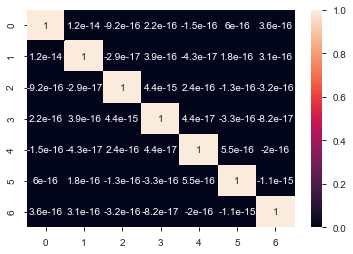

In [147]:
pca_new_df=pd.DataFrame(X_pca)
sns.heatmap(pca_new_df.corr(), annot=True)

#after doing PCA it can be observed that the correlation among PCA components has reduced and is almost 0.

In [148]:
pca_new_df.shape

(681, 7)

F:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


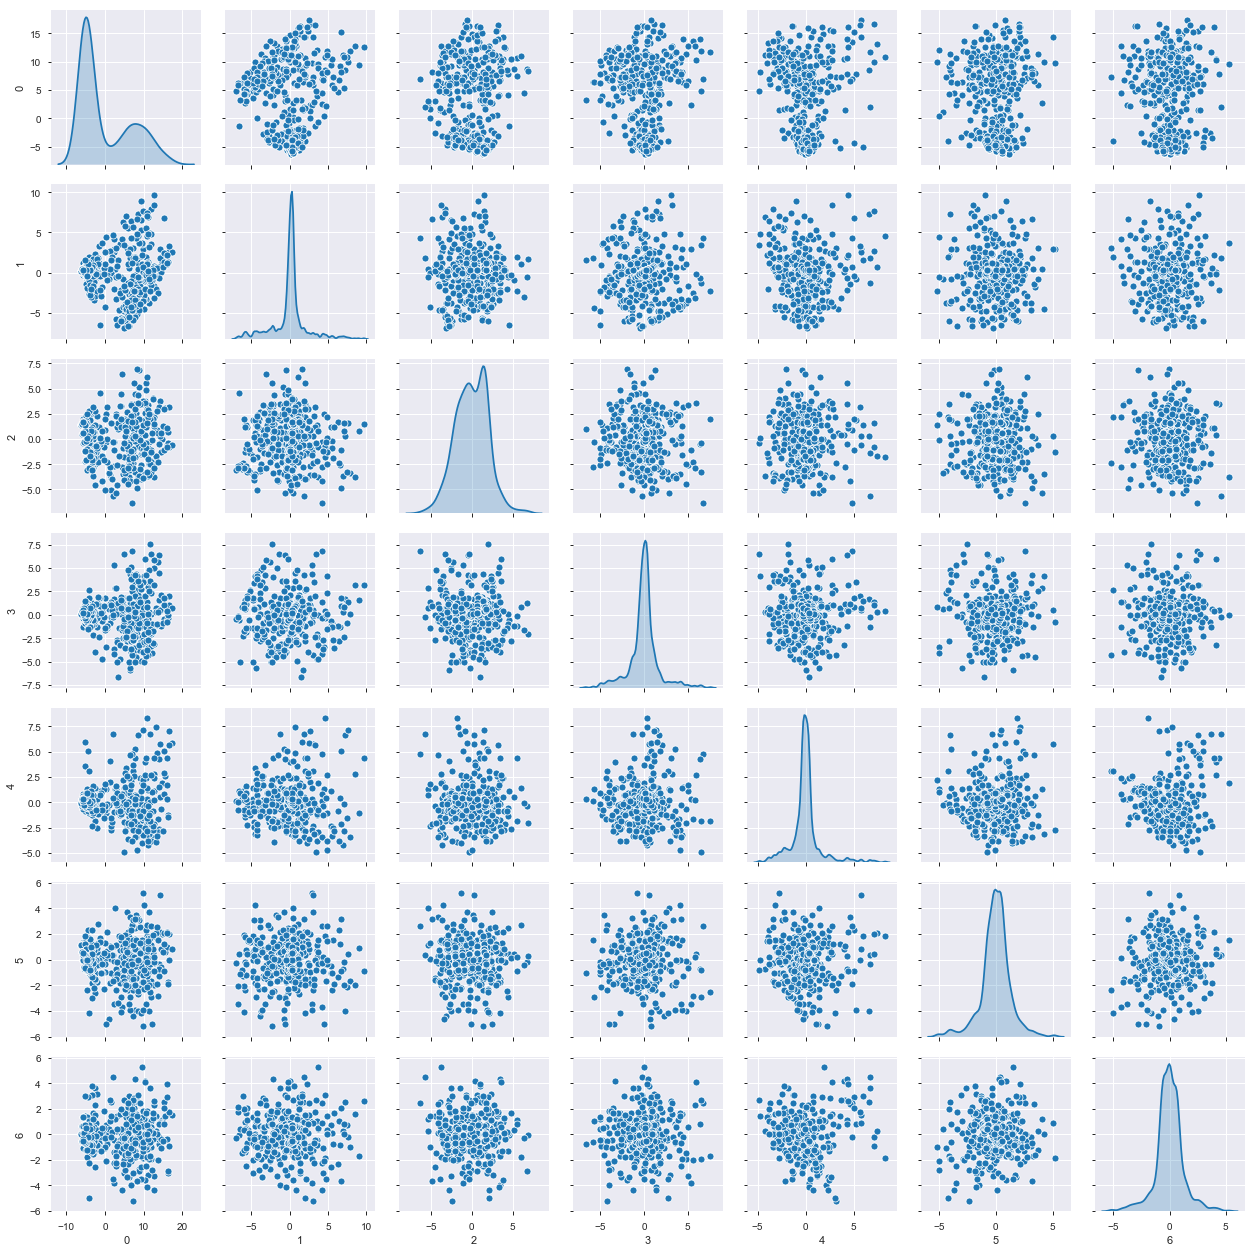

In [149]:
sns.pairplot(pca_new_df, diag_kind='kde') 

In [ ]:
# the Pair plots of the 7 principal components also shows that the new datapoints are not corelated